In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
import numpy as np
from utils import utils

seed = 42

# Define sample sizes and number of runs
sample_sizes = [100, 200, 300, 400, 500]
num_outer_runs = 25
significance_level = 0.05

/Users/anirbanc/Documents/GitHub/mMMD/Experiments/minimax/utils/betMMD_utils.py:182: SyntaxWarning: invalid escape sequence '\l'
  K_{t} = K_{t-1} \times (1 + \lambda_t F_t),


In [ ]:
def gaussian_l2_mu2(d, delta):

    # Constant C_d = 2 (4π)^(-d/2)
    C_d = 2 * (4 * np.pi)**(-d / 2)
    print (C_d)

    if delta**2 >= C_d:
        raise ValueError("delta is too large; no solution exists.")

    # Solve for the required norm of mu_2
    mu_norm = 2 * np.sqrt(-np.log(1 - delta**2 / C_d))

    mu2 = np.zeros(d)
    mu2[0] = mu_norm

    return mu2

In [3]:
# Type I error control

# Parameters
d = 1           # Dimension
j = 1           # Number of coordinates to shift

power_results = []

for sample_size in sample_sizes:

    delta = np.log(sample_size) * (sample_size ** (-2/(d+4)))
    print (delta)
    # epsilon = gaussian_l2_mu2(d, delta)  # Mean shift in first j coordinates

    # Mean vectors
    x_mean = np.zeros(d)
    y_mean = np.zeros(d)
    # y_mean[:j] = epsilon  # Apply shift to first j coordinates

    # Covariance matrices
    x_cov = y_cov = np.eye(d)

    # Define distributions
    X_distribution = multivariate_normal(mean=x_mean, cov=x_cov)
    Y_distribution = multivariate_normal(mean=y_mean, cov=y_cov)

    gamma_value = sample_size ** (4/(d+4))

    betting_args = None

    power_results.append(compute_power_over_sample_sizes(
    X_distribution, Y_distribution, [sample_size], num_outer_runs, significance_level, Kernel = RBF_Kernel, gamma_value=gamma_value, betting_args = betting_args, seed = seed
))

0.7298702877897406


Sample size 100: 100%|██████████| 25/25 [00:10<00:00,  2.31it/s]


0.6363938447948997


Sample size 200: 100%|██████████| 25/25 [00:33<00:00,  1.34s/it]


0.5825248444375605


Sample size 300: 100%|██████████| 25/25 [01:32<00:00,  3.71s/it]


0.5453922939082327


Sample size 400: 100%|██████████| 25/25 [03:15<00:00,  7.83s/it]


0.5173991905087051


Sample size 500: 100%|██████████| 25/25 [06:13<00:00, 14.94s/it]


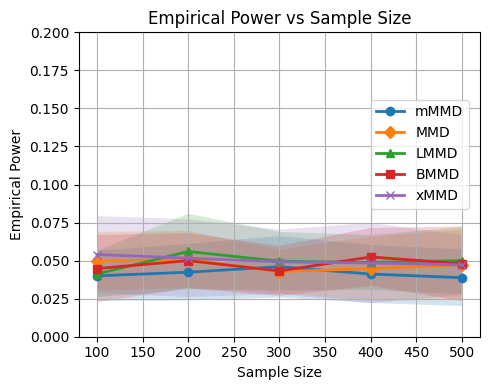

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

test_names = list(power_results[0].keys())

markers = ['o', 'D', '^', 's', 'x', '*']

custom_labels = {
    'mmd': 'MMD',
    'mMMD': 'mMMD',
    'LMMD': 'LMMD',
    'BTest': 'BMMD',
    'CrossMMD': 'xMMD',
    'BetMMD': 'BetMMD'
}

# Number of sample sizes = length of list
num_points = len(power_results)


plt.figure(figsize=(5, 4))

# Aggregate and plot each test
for i, test in enumerate(test_names):

    means = np.array([entry[test]["mean"][0] for entry in power_results])
    stds  = np.array([entry[test]["std"][0]  for entry in power_results])

    lower = means - stds
    upper = means + stds

    plt.plot(sample_sizes, means,
             label=custom_labels.get(test, test),
             marker=markers[i % len(markers)],
             linewidth=2)

    plt.fill_between(sample_sizes, lower, upper, alpha=0.2)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Power")
plt.title("Empirical Power vs Sample Size")
plt.ylim(0, 0.2)
plt.legend(loc="center", bbox_to_anchor=(0.85, 0.6))
plt.grid(True)

plt.tight_layout()
plt.savefig("results/empirical_typeI_vs_sample_size_minimax.pdf", dpi=1200)
plt.show()


In [10]:
# Power

# Parameters
d = 1           # Dimension
j = 1           # Number of coordinates to shift

power_results = []
n_power = 1.25

for sample_size in sample_sizes:

    delta = (sample_size ** (-n_power/(d+4)))
    print (delta)
    epsilon = gaussian_l2_mu2(d, delta)  # Mean shift in first j coordinates

    # Mean vectors
    x_mean = np.zeros(d)
    y_mean = np.zeros(d)
    y_mean[:j] = epsilon  # Apply shift to first j coordinates

    # Covariance matrices
    x_cov = y_cov = np.eye(d)

    # Define distributions
    X_distribution = multivariate_normal(mean=x_mean, cov=x_cov)
    Y_distribution = multivariate_normal(mean=y_mean, cov=y_cov)

    gamma_value = sample_size ** (4/(d+4))

    betting_args = None

    power_results.append(compute_power_over_sample_sizes(
    X_distribution, Y_distribution, [sample_size], num_outer_runs, significance_level, Kernel = RBF_Kernel, gamma_value=gamma_value, betting_args = betting_args, seed = seed
))

0.31622776601683794
0.5641895835477563


Sample size 100: 100%|██████████| 25/25 [00:09<00:00,  2.50it/s]


0.26591479484724945
0.5641895835477563


Sample size 200: 100%|██████████| 25/25 [00:34<00:00,  1.36s/it]


0.24028114141347542
0.5641895835477563


Sample size 300: 100%|██████████| 25/25 [01:35<00:00,  3.81s/it]


0.22360679774997896
0.5641895835477563


Sample size 400: 100%|██████████| 25/25 [02:56<00:00,  7.08s/it]


0.21147425268811282
0.5641895835477563


Sample size 500: 100%|██████████| 25/25 [06:23<00:00, 15.35s/it]


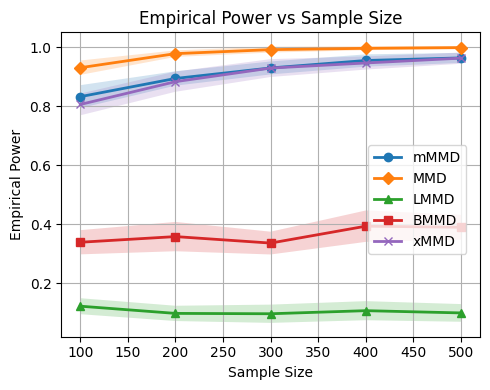

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

test_names = list(power_results[0].keys())

markers = ['o', 'D', '^', 's', 'x', '*']

custom_labels = {
    'mmd': 'MMD',
    'mMMD': 'mMMD',
    'LMMD': 'LMMD',
    'BTest': 'BMMD',
    'CrossMMD': 'xMMD',
    'BetMMD': 'BetMMD'
}

# Number of sample sizes = length of list
num_points = len(power_results)

plt.figure(figsize=(5, 4))

# ---------------------------------------------------
# Aggregate and plot each test
# ---------------------------------------------------
for i, test in enumerate(test_names):

    means = np.array([entry[test]["mean"][0] for entry in power_results])
    stds  = np.array([entry[test]["std"][0]  for entry in power_results])

    lower = means - stds
    upper = means + stds

    plt.plot(sample_sizes, means,
             label=custom_labels.get(test, test),
             marker=markers[i % len(markers)],
             linewidth=2)

    plt.fill_between(sample_sizes, lower, upper, alpha=0.2)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Power")
plt.title("Empirical Power vs Sample Size")
plt.legend(loc="center", bbox_to_anchor=(0.85, 0.45))
plt.grid(True)

plt.tight_layout()
plt.savefig("results/empirical_power_vs_sample_size_minimax_125.pdf", dpi=1200)
plt.show()


In [8]:
# Power

# Parameters
d = 1           # Dimension
j = 1           # Number of coordinates to shift

power_results = []
n_power = 1

for sample_size in sample_sizes:

    delta = (sample_size ** (-n_power/(d+4)))
    print (delta)
    epsilon = gaussian_l2_mu2(d, delta)  # Mean shift in first j coordinates

    # Mean vectors
    x_mean = np.zeros(d)
    y_mean = np.zeros(d)
    y_mean[:j] = epsilon  # Apply shift to first j coordinates

    # Covariance matrices
    x_cov = y_cov = np.eye(d)

    # Define distributions
    X_distribution = multivariate_normal(mean=x_mean, cov=x_cov)
    Y_distribution = multivariate_normal(mean=y_mean, cov=y_cov)

    gamma_value = sample_size ** (4/(d+4))

    betting_args = None

    power_results.append(compute_power_over_sample_sizes(
    X_distribution, Y_distribution, [sample_size], num_outer_runs, significance_level, Kernel = RBF_Kernel, gamma_value=gamma_value, betting_args = betting_args, seed = seed
))

0.3981071705534972
0.5641895835477563


Sample size 100: 100%|██████████| 25/25 [00:10<00:00,  2.29it/s]


0.3465724215775732
0.5641895835477563


Sample size 200: 100%|██████████| 25/25 [00:40<00:00,  1.63s/it]


0.3195771718380609
0.5641895835477563


Sample size 300: 100%|██████████| 25/25 [01:44<00:00,  4.17s/it]


0.30170881682725814
0.5641895835477563


Sample size 400: 100%|██████████| 25/25 [03:06<00:00,  7.46s/it]


0.2885399811814427
0.5641895835477563


Sample size 500: 100%|██████████| 25/25 [06:17<00:00, 15.12s/it]


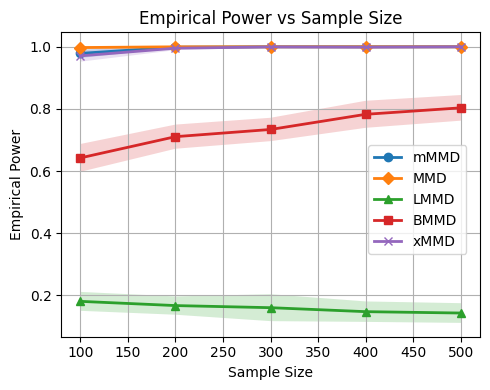

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

test_names = list(power_results[0].keys())

markers = ['o', 'D', '^', 's', 'x', '*']

custom_labels = {
    'mmd': 'MMD',
    'mMMD': 'mMMD',
    'LMMD': 'LMMD',
    'BTest': 'BMMD',
    'CrossMMD': 'xMMD',
    'BetMMD': 'BetMMD'
}

# Number of sample sizes = length of list
num_points = len(power_results)

plt.figure(figsize=(5, 4))

# Aggregate and plot each test
for i, test in enumerate(test_names):

    means = np.array([entry[test]["mean"][0] for entry in power_results])
    stds  = np.array([entry[test]["std"][0]  for entry in power_results])

    lower = means - stds
    upper = means + stds

    plt.plot(sample_sizes, means,
             label=custom_labels.get(test, test),
             marker=markers[i % len(markers)],
             linewidth=2)

    plt.fill_between(sample_sizes, lower, upper, alpha=0.2)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Power")
plt.title("Empirical Power vs Sample Size")
plt.legend(loc="center", bbox_to_anchor=(0.85, 0.45))
plt.grid(True)

plt.tight_layout()
plt.savefig("results/empirical_power_vs_sample_size_minimax_1.pdf", dpi=1200)
plt.show()
